# Bias, Variance

#### Definition
* $Bias(\hat{\theta})=\mathbb{E}(\hat{\theta})-\theta$
* $var(\hat{\theta})=\mathbb{E}(\hat{\theta}-\mathbb{E}(\hat{\theta}))^2$

where $\theta$ is the true parameter and $\hat{\theta}$ is the estimator. 
An estimator is just a function of the observed (random) data (i.e. $\hat{\theta} = \hat{\theta}(X)$) and so is itself a random variable.    
- Bias: tells how far the expected value of the estimator is from the truth.
- Variance: how variable the estimator is.

A good estimator should have low bias and low variance.

#### MSE Bias-variance decomposition    
The mean squared error (MSE) is a metric that is widely used in statists and machine learning. For an estimator $\hat{\theta}$, MSE is defined by:
\begin{align*}
MSE(\hat{\theta}):=\mathbb{E}(\hat{\theta}-\theta)^2
\end{align*}

\begin{align*}
MSE(\hat{\theta})&=\mathbb{E}(\hat{\theta}-\theta)^2\\
&=\mathbb{E}[\hat{\theta}-\mathbb{E}(\hat{\theta})+\mathbb{E}(\hat{\theta})-\theta]^2 \\
&=\mathbb{E}[(\hat{\theta}-\mathbb{E}(\hat{\theta}))^2+2(\hat{\theta}-\mathbb{E}(\hat{\theta}))(\mathbb{E}(\hat{\theta})-\theta)+(\mathbb{E}(\hat{\theta})-\theta)^2] \\
&=\mathbb{E}(\hat{\theta}-\mathbb{E}(\hat{\theta}))^2+2\mathbb{E}[(\hat{\theta}-\mathbb{E}(\hat{\theta}))(\mathbb{E}(\hat{\theta})-\theta)]+\mathbb{E}[\mathbb{E}(\hat{\theta})-\theta]^2 \\
&=\mathbb{E}(\hat{\theta}-\mathbb{E}(\hat{\theta}))^2+2(\mathbb{E}(\hat{\theta})-\mathbb{E}(\hat{\theta}))(\mathbb{E}(\hat{\theta})-\theta)+[\mathbb{E}(\hat{\theta})-\theta]^2 \\
&=\mathbb{E}(\hat{\theta}-\mathbb{E}(\hat{\theta}))^2+0+[\mathbb{E}(\hat{\theta})-\theta]^2 \\
&=var(\hat{\theta}) + bias(\hat{\theta})^2
\end{align*}

#### Bias-Variance for Learning Functions    
In a general (supervised) learning problem, we have access to a dataset $D$ which consists not only of feature vectors $X$, but also response values $y$, so that 

$$
D = \{(x_1,y_1),\dots,(x_n, y_n)\}.
$$

Assume that there exists some true (but unobservable) function $f$ that takes as input a feature vector $X$ and outputs a response $y$. In addition, the observed responses are corrupted by some additive noise. Then, 

$$
y = f(x) + \epsilon, \qquad \epsilon \sim (0,\sigma^2),
$$

where the notation $\epsilon \sim (0,\sigma^2)$ means that $\epsilon$ is a random variable with zero mean and variance $\sigma^2$. One way to think about $\epsilon$ is that it represents measurement error. The most common assumption is that $\epsilon$ is normally distributed, so we write: $\epsilon \sim N(0,\sigma^2)$.

The goal of learning is to use the data $D$ to find an estimate of $f$ called $\hat{f}$, so that $f$ and $\hat{f}$ are as close as possible. One common way to do this is to learn a $\hat{f}$ that minimizes the Mean Squared Error (MSE) between $y$ and $\hat{f}$. Apply Bias-Variance decomposition: 

$$
\mathbb{E} [(y- \hat{f}(x))^2] = \left ( \text{Bias}(\hat{f}(x)) \right)^2 + \text{Var}(\hat{f}(x)) + \sigma^2,
$$

where as before

$$
\text{Bias}(\hat{f}(x)) = \mathbb{E} [\hat{f}(x)] - f(x).
$$

The MSE of $\hat{f}$ may be decomposed into a sum of three terms:

1. (Squared) Bias: As discussed earlier, bias captures how far an estimate is from its target. Intuitively, simple algorithms (i.e. those with few parameters, such as linear models) will have high bias, since the 'true' function $f$ is rarely linear). We will see that models with low flexibility (linear models) tend to have high bias, and those with high flexibility (neural nets will have low bias).

2. Variance: this captures how sensitive the learning method is to changes in the dataset. i.e. given two datasets $D_1$, $D_2$, how different are the corresponding estimates $\hat{f}_1(x)$ and $\hat{f}_2(x)$? We will see that flexible learning algorithms, such as neural nets, will have high variance. Intuitively, since neural nets are so powerful, they can fit pretty much any decision surface, so estimates on different datasets can vary greatly.

3. $\sigma^2$: this is called the irreducible error, and since our responses contain noise, this is the error we have to live with in our predictions, regardless of the learning algorithm we use.

##### Bias and variance trade-off     
Learning algorithms that have low bias will tend to have high variance, and vice versa. In machine learning, we wish to find models that minimize MSE, and so we have to choose models that achieve the right balance between these two competing criteria.

#### Visualize bias and variance trade-off    
Consider a function: 

$$
f(x) = 0.00002 x^3 + 0.2 \cos(x^{1.2}).
$$

Randomly sample 25 data points with $\sigma=0.2$

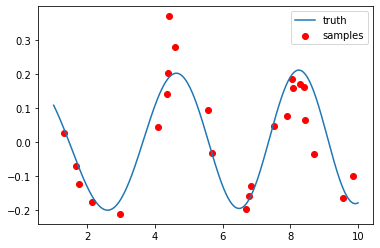

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(8964)


def f_sampler(f, n=100, sigma=0.2):
    # sample points from function f with Gaussian noise (0,sigma**2)
    x_vals = np.random.uniform(low=1, high=10, size=n)
    y_vals = f(x_vals) + sigma * np.random.normal(0, 1, size=n)

    # build dataset D
    D = np.zeros(shape=(n, 2))
    D[:, 0] = x_vals
    D[:, 1] = y_vals

    return D


def f(x): return 0.00002 * x**3 + 0.2 * np.cos(x**1.2)  # true function


fsamples = f_sampler(f, 25, sigma=0.1)

xx = np.linspace(1, 10, 1000)
plt.plot(xx, f(xx), label="truth")
plt.scatter(*fsamples.T, color="red", label="samples")
plt.legend()
plt.show()

Generate 80 datasets. For each dataset, fit 9 models: the first model being a linear regression with degree 1, the second having both $x$ and $x^2$, and the final model having $x,\dots, x^9$ as features.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

nmb_datasets = 80
xx_len = 1000

# generate datasets
datasets = np.array([f_sampler(f, 25, sigma=0.2) for _ in range(nmb_datasets)])
xx = np.linspace(1,10, xx_len)

preds = np.zeros(shape=(9, nmb_datasets, xx_len)) # store all predictions for all models

for deg in range(1, 10):
    Xs = np.array([D[:,0].reshape(-1,1) for D in datasets])
    ys = np.array([D[:,1].reshape(-1,1) for D in datasets])
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    Xs = np.array([poly.fit_transform(X) for X in Xs])        # get polynomial feature matrix
    
    # fit models on all datasets
    lrs = np.array([LinearRegression().fit(X, y) for (X,y) in zip(Xs, ys)])
    
    # predictions on range xx 
    xx_poly = poly.fit_transform(xx.reshape(-1,1))
    preds[deg-1,:,:] = np.array([mod.predict(xx_poly) for mod in lrs]).reshape(nmb_datasets, xx_len)

Visualize the models.

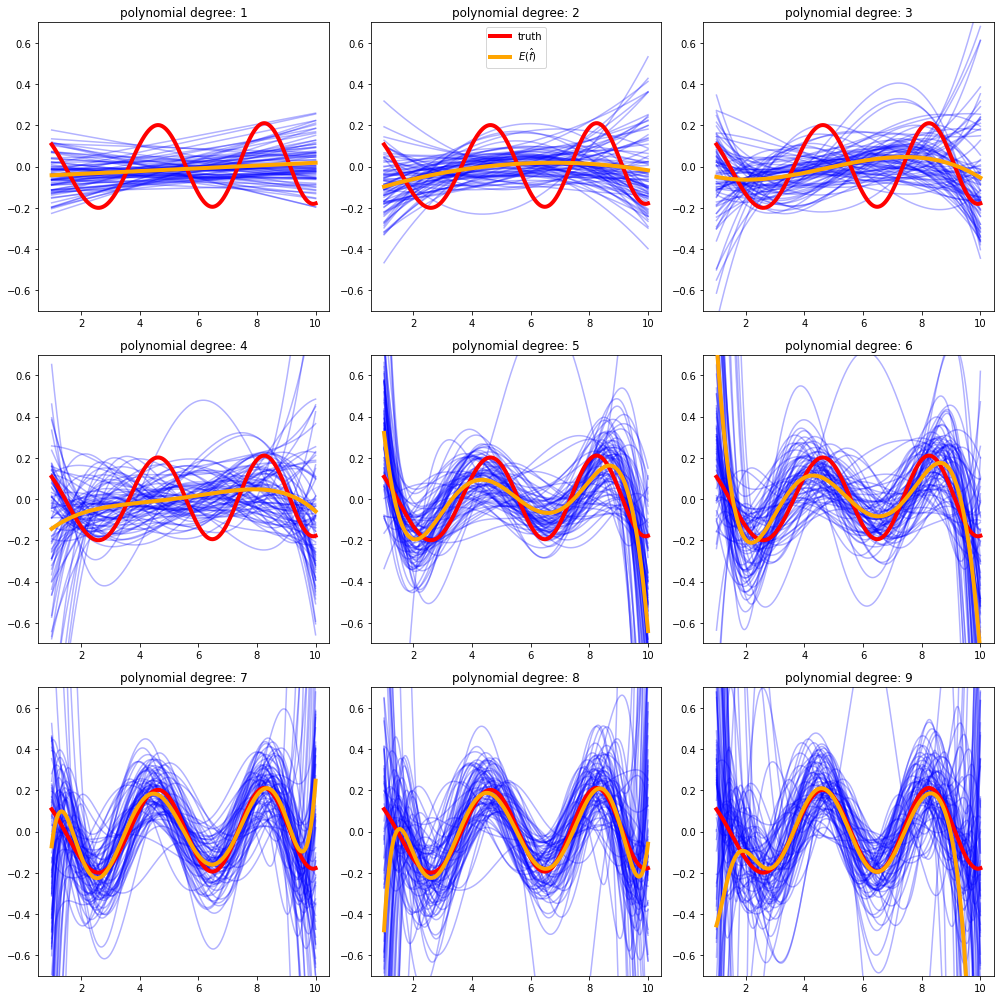

In [14]:
fig, ax = plt.subplots(3,3, figsize=(14,14))
truth = f(xx)
for j, ax in enumerate(ax.flat):
    avg_pred = np.mean(preds[j], axis=0)
    ax.plot(xx, truth, color="red", linewidth=4, zorder=20, label="truth")
    ax.plot(xx, avg_pred, color="orange", linewidth=4, zorder=20, label="$E(\\hat{f})$")    
    for i in range(nmb_datasets):
        ax.plot(xx, preds[j, i], alpha=0.3, color="blue", zorder=1)
        ax.set_title(f"polynomial degree: {j+1}")
        ax.set_ylim(-0.7,0.7)
    if j==1: ax.legend(loc="upper center")
plt.tight_layout()
plt.show()

Visualize bias and variance.

In [15]:
variances = np.zeros(shape=(9, xx_len))
bias_sq = np.zeros(shape=(9, xx_len))
for i in range(9):
    variances[i, :] = np.var(preds[i], axis=0)
    bias_sq[i, :] = (np.mean(preds[i], axis=0) - f(xx))**2

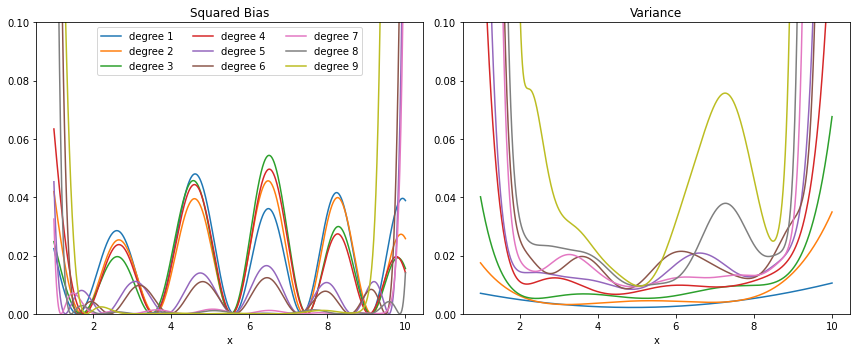

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
for i in range(9):
    ax1.plot(xx, bias_sq[i], label=f"degree {i+1}")
    ax2.plot(xx, variances[i])
    ax1.set_ylim(0,0.1)
    ax2.set_ylim(0,0.1)
    ax1.set_xlabel("x"); ax2.set_xlabel("x")
    ax1.set_title("Squared Bias")
    ax2.set_title("Variance")
ax1.legend(loc="upper center", ncol=3)
plt.tight_layout()